In [44]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate as tab

# ----------------------------------------------------------------------------------------

## LEVEL 0 Analysis:

In [45]:
#reading the data file and converting to DataFrame...
df=pd.read_csv("data (2).csv")
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


In [46]:
#first 5...
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1


In [47]:
#last 5...
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2
99999,216090,0,Revolving loans,M,Y,Y,0,202500.0,337500.0,337500.0,...,-3230,1,1,1,1,0,Drivers,2.0,SATURDAY,0


In [48]:
#shape (no. of rows & columns)...
df.shape

(100000, 24)

In [49]:
#extracting the statistical information/description...
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,CNT_FAM_MEMBERS,TOTAL_DOC_SUBMITTED
count,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,9.991900e+04,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,99999.000000,100000.000000
mean,158006.140860,0.080930,0.417390,1.694261e+05,5.990034e+05,5.383451e+05,63292.222060,0.999990,0.82128,0.199740,0.997990,0.056190,2.155672,0.931210
std,33481.166996,0.272729,0.721014,3.835007e+05,4.020520e+05,3.693977e+05,140839.697296,0.003162,0.38312,0.399807,0.044788,0.230289,0.908897,0.343917
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,4.500000e+04,-17531.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,129076.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,2.385000e+05,-2758.000000,1.000000,1.00000,0.000000,1.000000,0.000000,2.000000,1.000000
50%,157877.000000,0.000000,0.000000,1.440000e+05,5.130405e+05,4.500000e+05,-1219.000000,1.000000,1.00000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,186982.250000,0.000000,1.000000,2.025000e+05,8.086500e+05,6.795000e+05,-291.000000,1.000000,1.00000,0.000000,1.000000,0.000000,3.000000,1.000000
max,216090.000000,1.000000,12.000000,1.170000e+08,4.050000e+06,4.050000e+06,365243.000000,1.000000,1.00000,1.000000,1.000000,1.000000,14.000000,4.000000


In [50]:
#extracting the inside information... 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

In [51]:
#checking the null/nan values...
df.isnull().sum()
#No null/nan values...

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

In [52]:
#checking the data-types [(object(categorical/strings) or numerical]...
df.dtypes

SK_ID_CURR               int64
TARGET                   int64
NAME_CONTRACT_TYPE      object
GENDER                  object
Car                     object
House                   object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_GOODS_PRICE        float64
NAME_TYPE_SUITE         object
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
DAYS_EMPLOYED            int64
MOBILE                   int64
WORK_PHONE               int64
HOME_PHONE               int64
MOBILE_REACHABLE         int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
APPLICATION_DAY         object
TOTAL_DOC_SUBMITTED      int64
dtype: object

In [53]:
#extracting column names...
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

In [54]:
#Seprating categorical and continuous variables...

def seprate_data_types(df):
    
    categorical = []
    continuous = []
    
    for column in df.columns: 
        
        if df[column].nunique() < 9:     
            categorical.append(column)
            
        else:
            continuous.append(column)
            
    return categorical, continuous 

categorical, continuous = seprate_data_types(df)       

In [55]:
#table=|categorical|countinuous|
#creating a table...

print(tab
        ({"Categorical":categorical,
                "Continuous":continuous},
                                        headers=["CATEGORICAL",
                                                 "CONTINUOUS"]))

CATEGORICAL          CONTINUOUS
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   CNT_CHILDREN
GENDER               AMT_INCOME_TOTAL
Car                  AMT_CREDIT
House                AMT_GOODS_PRICE
NAME_TYPE_SUITE      DAYS_EMPLOYED
NAME_INCOME_TYPE     OCCUPATION_TYPE
NAME_EDUCATION_TYPE  CNT_FAM_MEMBERS
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


In [56]:
df.dtypes

SK_ID_CURR               int64
TARGET                   int64
NAME_CONTRACT_TYPE      object
GENDER                  object
Car                     object
House                   object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_GOODS_PRICE        float64
NAME_TYPE_SUITE         object
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
DAYS_EMPLOYED            int64
MOBILE                   int64
WORK_PHONE               int64
HOME_PHONE               int64
MOBILE_REACHABLE         int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
APPLICATION_DAY         object
TOTAL_DOC_SUBMITTED      int64
dtype: object

# ----------------------------------------------------------------------------------------

## LEVEL 1 Analysis:

# $Univariate \ Analysis \$

In [57]:
#Categorical column/data infoormation extracting user-defined function...

def cat_info(col):
    
        #unique() returns the unique values in the column...
        print(f"Unique values in {col} : {df[col].unique()}")
        
        #mode() returns the mode(most recurring value (index[0])) of the column...
        print(f"Mode of {col} : {df[col].mode()[0]}")
        
        #isnull().sum() counts the number of null in dataframe...
        print(f"Number of missing values in {col} : {df[col].isnull().sum()}")
        
        #`checking if null values are present...
        if df[col].isnull().sum() > 0:
            
            print(f"\nThere are null values in the {col} column")

## Analysis of categorical data:

# 1. TARGET

In [58]:
cat_info("TARGET")

Unique values in TARGET : [1 0]
Mode of TARGET : 0
Number of missing values in TARGET : 0


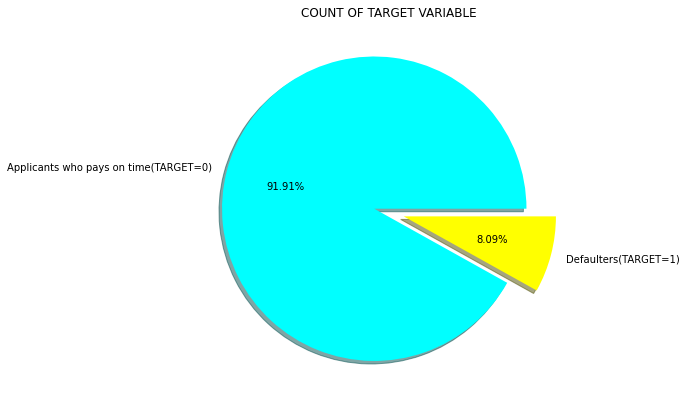

In [59]:
#piechart for Target...
fig, ax = plt.subplots( figsize = (15, 7))
 
percentage = df["TARGET"].value_counts()

labels=[("Applicants who pays on time(TARGET=0)"), "Defaulters(TARGET=1)"]

plt.pie(percentage,
        labels=labels,
        explode=(0.1,0.1),
        shadow=True,
        colors=("cyan","yellow"),
        autopct= "%0.2f%%")

plt.title("COUNT OF TARGET VARIABLE")

plt.show()

In [60]:
df["TARGET"].value_counts()

0    91907
1     8093
Name: TARGET, dtype: int64

##### interpretation:
>Here in the above chart we can observe that 91.91% of clients are facing difficulties in payment whereas 8.09% of clients are of other cases.  

# 2. NAME_CONTRACT_TYPE

In [61]:
cat_info("NAME_CONTRACT_TYPE")

Unique values in NAME_CONTRACT_TYPE : ['Cash loans' 'Revolving loans']
Mode of NAME_CONTRACT_TYPE : Cash loans
Number of missing values in NAME_CONTRACT_TYPE : 0


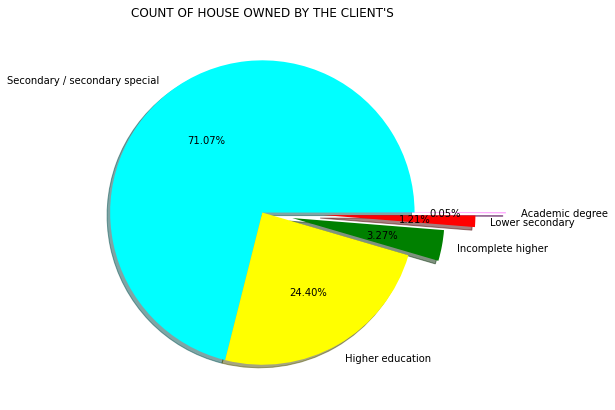

In [62]:
fig, ax = plt.subplots( figsize = (15, 7))
 
percentage = df["NAME_EDUCATION_TYPE"].value_counts()

labels=["Secondary / secondary special",
        "Higher education",
        "Incomplete higher",
        "Lower secondary",
        "Academic degree"]

plt.pie(percentage,
        labels=labels,
        explode=(0.0,0.0,0.2,0.4,0.6),
        shadow=True,
        colors=("cyan",
                "yellow",
                "green",
                "red",
                "magenta"),
                 autopct= "%0.2f%%")

plt.title("COUNT OF HOUSE OWNED BY THE CLIENT'S")

plt.show()

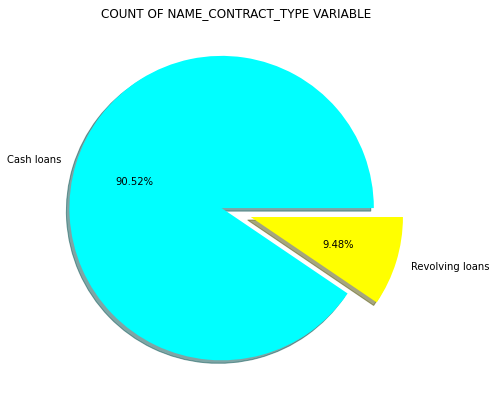

In [63]:
#piechart for Name Contract Type...
fig, ax = plt.subplots( figsize = (15, 7))
 
percentage = df["NAME_CONTRACT_TYPE"].value_counts()

labels=["Cash loans","Revolving loans"]

plt.pie(percentage,
        labels=labels,
        explode=(0.1,0.1),
        shadow=True,
        colors=("cyan","yellow"),
        autopct= "%0.2f%%")

plt.title("COUNT OF NAME_CONTRACT_TYPE VARIABLE")

plt.show()

In [64]:
df["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         90517
Revolving loans     9483
Name: NAME_CONTRACT_TYPE, dtype: int64

##### Interpretation:
>From the above chart we can notice that the type of loans i.e; cash or revolving and in how much proportion particularly.

* Cash Loan contracts have a higher number of credit than revolving loan contracts
* Count of Female is more

# 3. GENDER

In [65]:
cat_info("GENDER")

Unique values in GENDER : ['M' 'F' 'XNA']
Mode of GENDER : F
Number of missing values in GENDER : 0


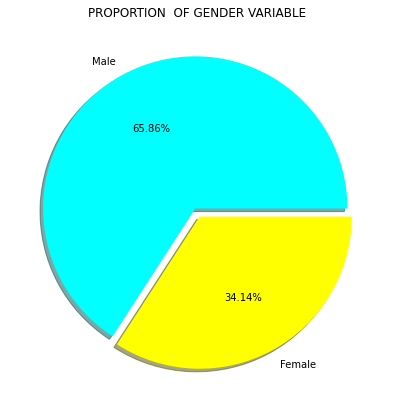

In [69]:
#piechart for Gender...
fig, ax = plt.subplots( figsize = (15, 7))
 
percentage = df["GENDER"].value_counts()

labels=["Male","Female"]

plt.pie(percentage,
        labels=labels,
        explode=(0.03,0.03),
        shadow=True,
        colors=("cyan","yellow"),
        autopct= "%0.2f%%")

plt.title("PROPORTION  OF GENDER VARIABLE")

plt.show()

In [68]:
#replacing gender missing values with mode...
df.GENDER.value_counts()
df.loc[df.GENDER == 'XNA','GENDER'] = 'F' 
df.GENDER.value_counts()

F    65858
M    34142
Name: GENDER, dtype: int64

##### Interpretation:
>From the above diagram we can notice that in Gold Atlantis Female clients are in high proportion when compared to Male clients.

In [120]:
df["GENDER"].value_counts()

F    65858
M    34142
Name: GENDER, dtype: int64

# 4. CAR

In [ ]:
cat_info("Car")

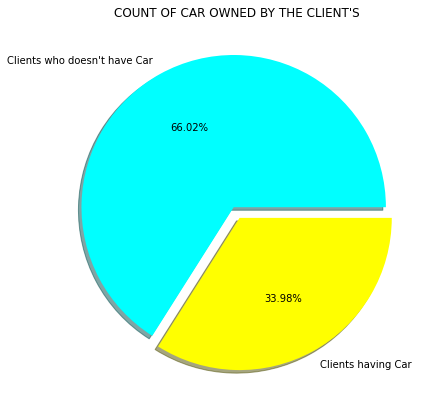

In [31]:
#piechart for car...
fig, ax = plt.subplots( figsize = (15, 7))
 
percentage = df["Car"].value_counts()

labels=["Clients who doesn't have Car","Clients having Car"]

plt.pie(percentage,
        labels=labels,
        explode=(0.04,0.04),
        shadow=True,
        colors=("cyan","yellow"),
        autopct= "%0.2f%%")

plt.title("COUNT OF CAR OWNED BY THE CLIENT'S")

plt.show()

In [ ]:
df["Car"].value_counts()

##### Interpretation:
>In the above demonstrated chart we have observed that majority of the clients doesn't own a car i.e; 66.02 % and 33.98 % of clients have a car.

# 5. HOUSE

In [23]:
cat_info("House")

Unique values in House : ['Y' 'N']
Mode of House : Y
Number of missing values in House : 0


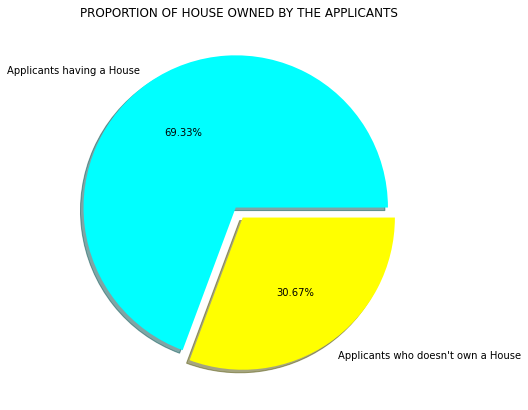

In [53]:
#piechart for car...
fig, ax = plt.subplots( figsize = (15, 7))
 
percentage = df["House"].value_counts()

labels=["Applicants having a House","Applicants who doesn't own a House"]

plt.pie(percentage,
        labels=labels,
        explode=(0.04,0.04),
        shadow=True,
        colors=("cyan","yellow"),
        autopct= "%0.2f%%")

plt.title("PROPORTION OF HOUSE OWNED BY THE APPLICANTS")

plt.show()

In [25]:
df["House"].value_counts()

Y    69328
N    30672
Name: House, dtype: int64

##### Interpretation:
>In the above demonstrated chart we have observed that majority of the clients own a house i.e; 69.33 % and 30.67 % of clients doesn't own a house.

# 6.NAME_INCOME_TYPE

In [29]:
cat_info("NAME_INCOME_TYPE")

Unique values in NAME_INCOME_TYPE : ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Mode of NAME_INCOME_TYPE : Working
Number of missing values in NAME_INCOME_TYPE : 0


In [242]:
df["NAME_INCOME_TYPE"].value_counts()

Working                 51902
Commercial associate    23217
Pensioner               17857
State servant            7000
Unemployed                 10
Student                     9
Businessman                 4
Maternity leave             1
Name: NAME_INCOME_TYPE, dtype: int64

<AxesSubplot:>

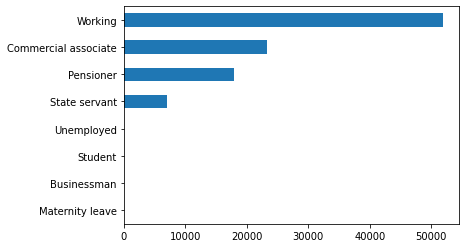

In [30]:
df["NAME_INCOME_TYPE"].value_counts().sort_values().plot.barh()

##### Interpretation:
>Here in the above chart we can observe that clients income sources like thier professions are very few in categories like unemployed, student, businessman, maternity leave....and majority are from working background and also professionally some average no. of clients are commercial associate, pensioner and state servant.

# 7. NAME_EDUCATION_TYPE

In [31]:
cat_info("NAME_EDUCATION_TYPE")

Unique values in NAME_EDUCATION_TYPE : ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Mode of NAME_EDUCATION_TYPE : Secondary / secondary special
Number of missing values in NAME_EDUCATION_TYPE : 0


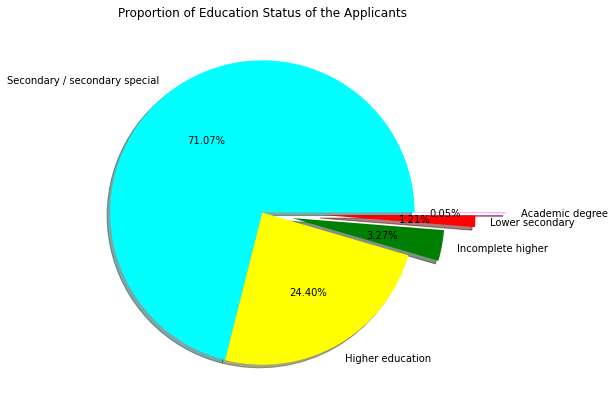

In [52]:
fig, ax = plt.subplots( figsize = (15, 7))
 
percentage = df["NAME_EDUCATION_TYPE"].value_counts()

labels=["Secondary / secondary special",
        "Higher education",
        "Incomplete higher",
        "Lower secondary",
        "Academic degree"]

plt.pie(percentage,
        labels=labels,
        explode=(0.0,0.0,0.2,0.4,0.6),
        shadow=True,
        colors=("cyan",
                "yellow",
                "green",
                "red",
                "magenta"),
                 autopct= "%0.2f%%")

plt.title("Proportion of Education Status of the Applicants")

plt.show()

In [32]:
df["NAME_EDUCATION_TYPE"].value_counts()

Secondary / secondary special    71068
Higher education                 24399
Incomplete higher                 3270
Lower secondary                   1214
Academic degree                     49
Name: NAME_EDUCATION_TYPE, dtype: int64

##### Interpretation:
>From the above chart we can notice that majority of the clients have atleast their education level at in secondary level i.e; 71.06 % and very few are graduates i.e; 0.05 % and cleints who all completed their higher education are the second most highest proportion compared to others and few also have completed thier lower secondary and few who haven't completed their higher education.

* From this comparison we can see that people with secondary education has defaulted the most.

# 8. NAME_FAMILY_STATUS

In [69]:
cat_info("NAME_FAMILY_STATUS")

Unique values in NAME_FAMILY_STATUS : ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
Mode of NAME_FAMILY_STATUS : Married
Number of missing values in NAME_FAMILY_STATUS : 0


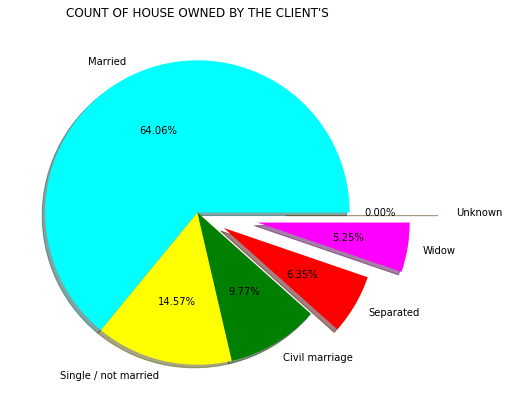

In [181]:
fig, ax = plt.subplots( figsize = (15, 7))
 
percentage = df["NAME_FAMILY_STATUS"].value_counts()

labels=["Married",
        "Single / not married",
        "Civil marriage",
        "Separated",
        "Widow",
        "Unknown"]

plt.pie(percentage,
        labels=labels,
        explode=(0.0,0.0,0.0,0.2,0.4,0.6),
        shadow=True,
        colors=("cyan",
                "yellow",
                "green",
                "red",
                "magenta",
               "orange"),
                 autopct= "%0.2f%%")

plt.title("COUNT OF HOUSE OWNED BY THE CLIENT'S")

plt.show()

In [68]:
df["NAME_FAMILY_STATUS"].value_counts()

Married                 64058
Single / not married    14571
Civil marriage           9769
Separated                6347
Widow                    5254
Unknown                     1
Name: NAME_FAMILY_STATUS, dtype: int64

##### Interpretation:
>From the above chart we can notice that the majority of the clients are married i.e; 64.06 %, proportion of Single / not married 14.57 % , few clients are widowed which are of proportion 5.25 % and others...

# 9. OCCUPATION_TYPE

In [90]:
cat_info("OCCUPATION_TYPE")

Unique values in OCCUPATION_TYPE : ['Laborers' 'Core staff' 'Accountants' 'Managers' 'Drivers' 'Sales staff'
 'Cleaning staff' 'Cooking staff' 'Private service staff' 'Medicine staff'
 'Security staff' 'High skill tech staff' 'Waiters/barmen staff'
 'Low-skill Laborers' 'Realty agents' 'Secretaries' 'IT staff' 'HR staff']
Mode of OCCUPATION_TYPE : Laborers
Number of missing values in OCCUPATION_TYPE : 0


In [88]:
#missing valuesw filled with mode()...

mode = df["OCCUPATION_TYPE"].mode()[0]  #[0] is index, without "[0]" we'll get boolean value...
print(mode)
df["OCCUPATION_TYPE"].fillna(mode, inplace = True, axis = 0)

Laborers


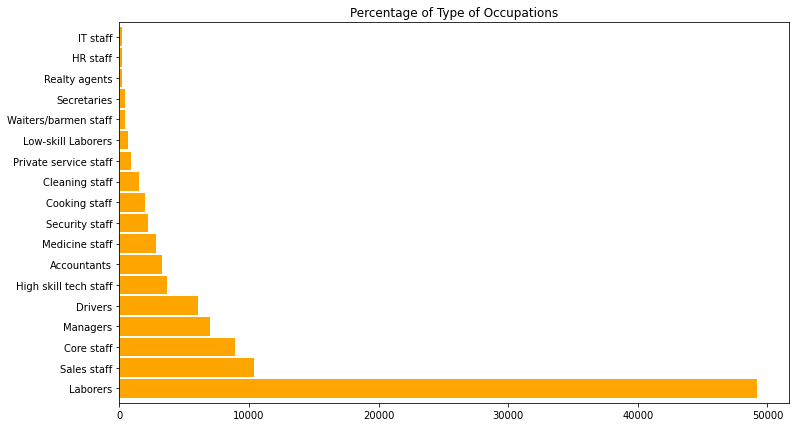

In [106]:
# Plotting a percentage graph having each category of "OCCUPATION_TYPE"

plt.figure(figsize = [12,7])
(df["OCCUPATION_TYPE"].value_counts()).plot.barh(color= "orange",width = 0.9)
plt.title("Percentage of Type of Occupations")
plt.show()

##### Interpretation:
>From the above demonstration we can observe that most of the clients are occupationally Laborers and the least no. of clients are HR staff, IT staff...  

In [89]:
df["OCCUPATION_TYPE"].value_counts()

Laborers                 49201
Sales staff              10383
Core staff                8952
Managers                  6969
Drivers                   6057
High skill tech staff     3650
Accountants               3258
Medicine staff            2851
Security staff            2201
Cooking staff             1954
Cleaning staff            1512
Private service staff      863
Low-skill Laborers         705
Waiters/barmen staff       437
Secretaries                415
Realty agents              242
HR staff                   181
IT staff                   169
Name: OCCUPATION_TYPE, dtype: int64

# ----------------------------------------------------------------------------------------

## Analysis of numerical data:

In [126]:
#User defined function for extracting numerical category column info...
def num_info(col):
    
    print(f"The mean of the {col} is {df[col].mean()}")
    
    print(f"The median of the {col} is {df[col].median()}")
    
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    
    print(f"The standard deviation of the {col} is {df[col].std()}")
    
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

In [191]:
#User defined function for drawing a boxplot and a histogram...
def box_hist(col):

    fig, ax = plt.subplots(1, 2, figsize= (20, 7))

    sns.histplot(x = df[col], ax =ax[1], color = "m") 

    sns.boxplot(x = df[col], ax = ax[0], color = "g") 

    plt.show()

In [ ]:
#filling mising values with mean in numerical data...
# mean = 36
# df["Age"].fillna(mean, axis = 0, inplace = True)

# 10. CNT_CHILDREN 

In [132]:
num_info("CNT_CHILDREN")

The mean of the CNT_CHILDREN is 0.41476
The median of the CNT_CHILDREN is 0.0
The mode of the CNT_CHILDREN is 0
The standard deviation of the CNT_CHILDREN is 0.7113221507812209
Number of missing values in the CNT_CHILDREN is 0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


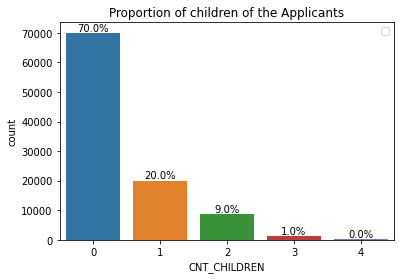

In [51]:
fig, ax = plt.subplots()
    
ax = sns.countplot(x = df["CNT_CHILDREN"])

for bar in ax.patches:
    
    percentage = f"{(round(bar.get_height() /len(df), 2)*100)}%" 
    
    x = bar.get_x() + bar.get_width() /2
    
    y = bar.get_height()   
    
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )
    #ax.annotate(percentage, (x, y), va = "top", ha ="center" )
plt.title("Proportion of children of the Applicants") 
plt.legend()
plt.show()

In [49]:
#outliers treatment...

mean=int(df.CNT_CHILDREN.mean())
x=df[df['CNT_CHILDREN']>4].index
for index in x:
    df.loc[index,'CNT_CHILDREN']=mean

In [134]:
df["CNT_CHILDREN"].value_counts()

0    70012
1    20025
2     8587
3     1227
4      149
Name: CNT_CHILDREN, dtype: int64

##### Interpretation:
>In the above chart we can observe that majority of the clients are having no children i.e; 70% and 20% are having one child and so on...

* We can see that low child count maximizes that chances of both being a defaulter and also non defaulter. 

# 11. AMT_INCOME_TOTAL

In [130]:
num_info("AMT_INCOME_TOTAL")

The mean of the AMT_INCOME_TOTAL is 169426.07027325002
The median of the AMT_INCOME_TOTAL is 144000.0
The mode of the AMT_INCOME_TOTAL is 135000.0
The standard deviation of the AMT_INCOME_TOTAL is 383500.74427719973
Number of missing values in the AMT_INCOME_TOTAL is 0


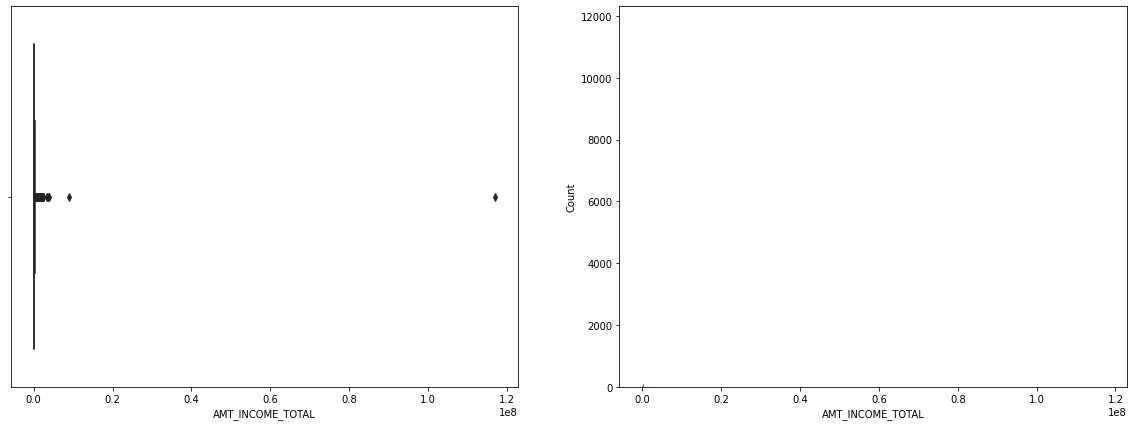

In [192]:
box_hist("AMT_INCOME_TOTAL")

In [193]:
mean=int(df['AMT_INCOME_TOTAL'].mean())
x=df[df['AMT_INCOME_TOTAL']>400000].index
for index in x:
    df.loc[index,'AMT_INCOME_TOTAL']=mean

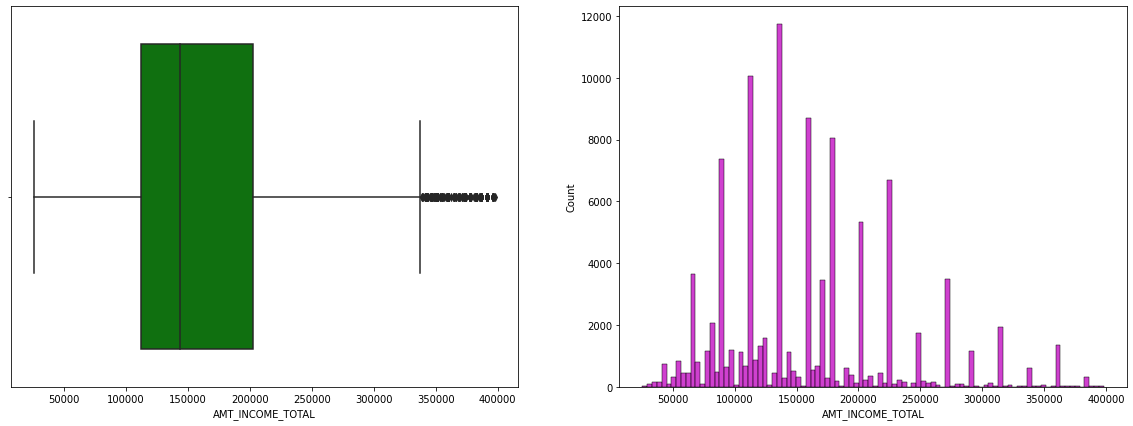

In [194]:
box_hist("AMT_INCOME_TOTAL")

##### Interpretation:
>Most of the clients have income in the 1st quartile  
Outliners are present in both  
3rd quartile is narrow for both target 1 and target 0

# 12. AMT_CREDIT

In [208]:
num_info("AMT_CREDIT")

The mean of the AMT_CREDIT is 599003.4465
The median of the AMT_CREDIT is 513040.5
The mode of the AMT_CREDIT is 450000.0
The standard deviation of the AMT_CREDIT is 402051.95912138297
Number of missing values in the AMT_CREDIT is 0


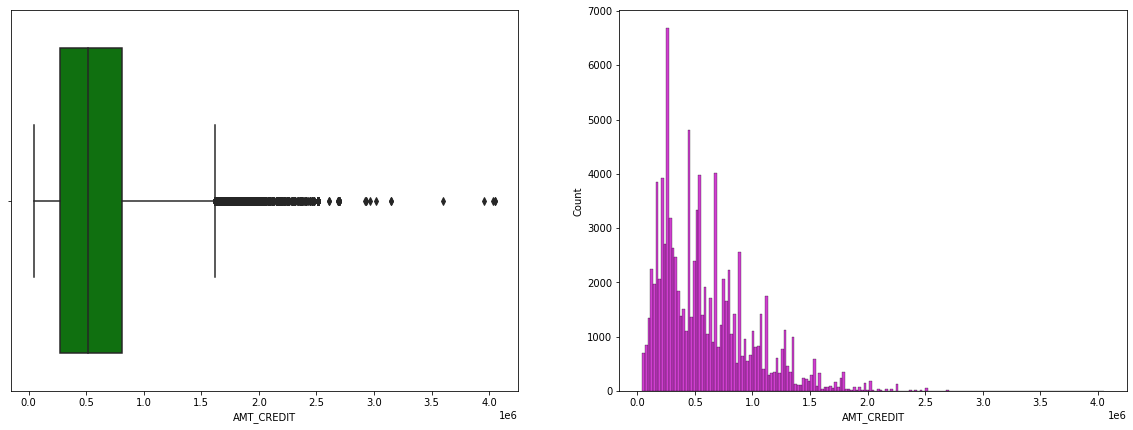

In [209]:
box_hist("AMT_CREDIT")

In [218]:
mean=int(df['AMT_CREDIT'].mean())
x=df[df['AMT_CREDIT']>2200000].index
for index in x:
    df.loc[index,'AMT_CREDIT']=mean

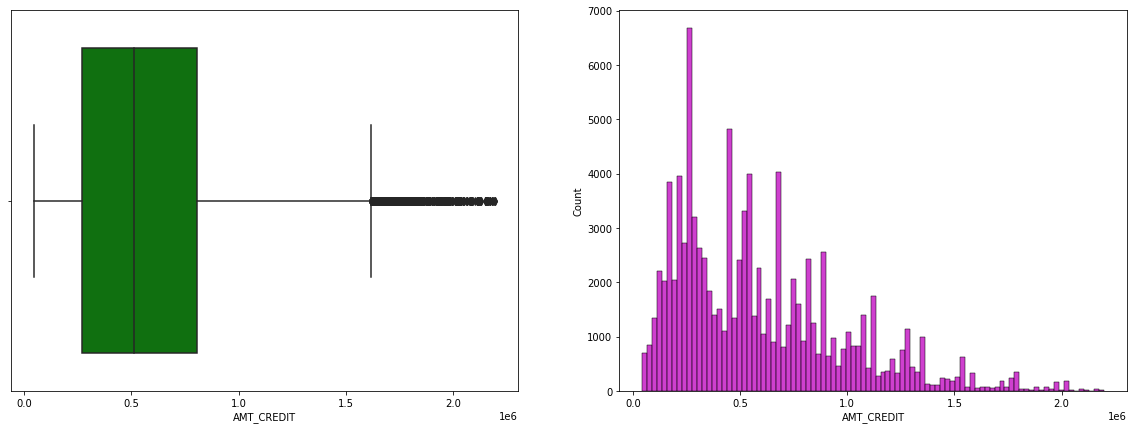

In [219]:
box_hist("AMT_CREDIT")

##### Interpretation:
>Outliners are present in both(error)   
3rd quartile is narrow for both target 1 and target 0  
Most of the clients have income in the 1st quartile  

# 13. AMT_GOODS_PRICE

In [221]:
num_info("AMT_GOODS_PRICE")

The mean of the AMT_GOODS_PRICE is 538345.1489706662
The median of the AMT_GOODS_PRICE is 450000.0
The mode of the AMT_GOODS_PRICE is 450000.0
The standard deviation of the AMT_GOODS_PRICE is 369397.72464216285
Number of missing values in the AMT_GOODS_PRICE is 81


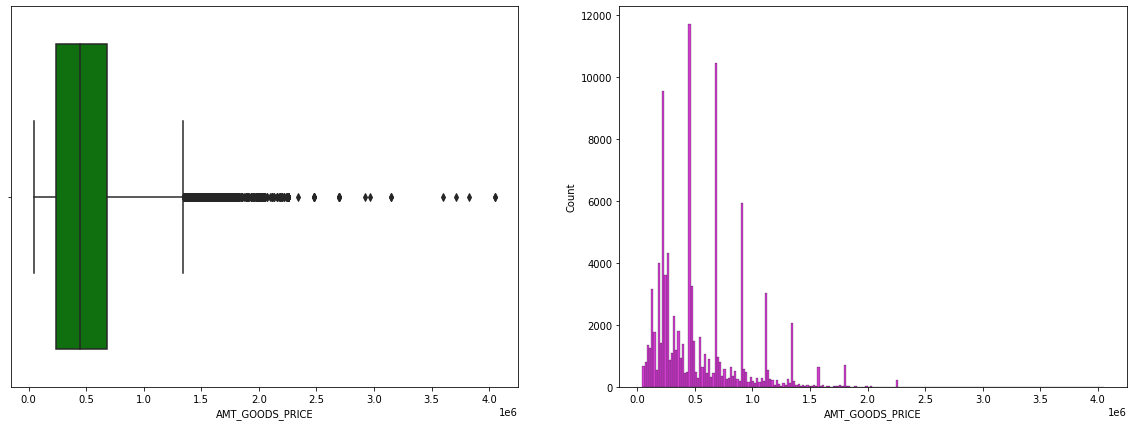

In [222]:
box_hist("AMT_GOODS_PRICE")

In [223]:
mean=int(df['AMT_GOODS_PRICE'].mean())
x=df[df['AMT_GOODS_PRICE']>2200000].index
for index in x:
    df.loc[index,'AMT_GOODS_PRICE']=mean

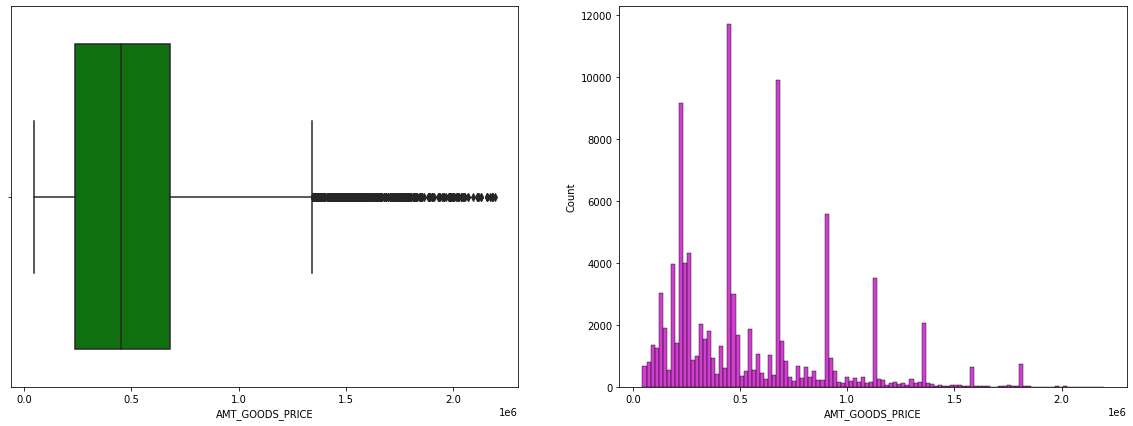

In [224]:
box_hist("AMT_GOODS_PRICE")

##### Interpretation:
>

# 14. CNT_FAM_MEMBERS

In [150]:
num_info("CNT_FAM_MEMBERS")

The mean of the CNT_FAM_MEMBERS is 2.112811128111281
The median of the CNT_FAM_MEMBERS is 2.0
The mode of the CNT_FAM_MEMBERS is 2.0
The standard deviation of the CNT_FAM_MEMBERS is 0.8340249927859106
Number of missing values in the CNT_FAM_MEMBERS is 1


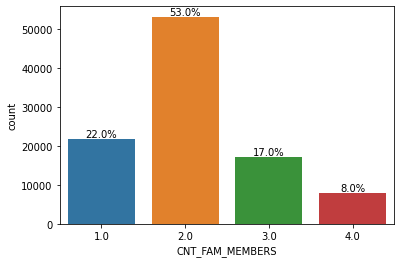

In [151]:
fig, ax = plt.subplots()
    
ax = sns.countplot(x = df["CNT_FAM_MEMBERS"])

for bar in ax.patches:
    
    percentage = f"{(round(bar.get_height() /len(df), 2)*100)}%" 
    
    x = bar.get_x() + bar.get_width() /2
    
    y = bar.get_height()   
    
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )
    #ax.annotate(percentage, (x, y), va = "top", ha ="center" )
           
plt.show()

In [154]:
#outliers treatment...

mean=int(df.CNT_FAM_MEMBERS.mean())
x=df[df['CNT_FAM_MEMBERS']>4].index
for index in x:
    df.loc[index,'CNT_FAM_MEMBERS']=mean

In [153]:
df["CNT_FAM_MEMBERS"].value_counts()

2.0    53063
1.0    21810
3.0    17161
4.0     7965
Name: CNT_FAM_MEMBERS, dtype: int64

##### Interpretation:
>From the above demonstration we can estimate that majority of the clients are with 2 family members i.e; 53% and very few are i.e; 8% are with 4 family members...

# ----------------------------------------------------------------------------------------

# LEVEL 2 Analysis

# $Bivariate \ Analysis \$

# Categorical v/s Categorical Analysis

In [161]:
def cat_cat_hist(col):
    fig, ax = plt.subplots(figsize = (10, 7))
    sns.countplot(x = (col), hue = "TARGET", data = df)
    plt.title(col)
    plt.legend()
    plt.show()

# 1. Target v/s Gender

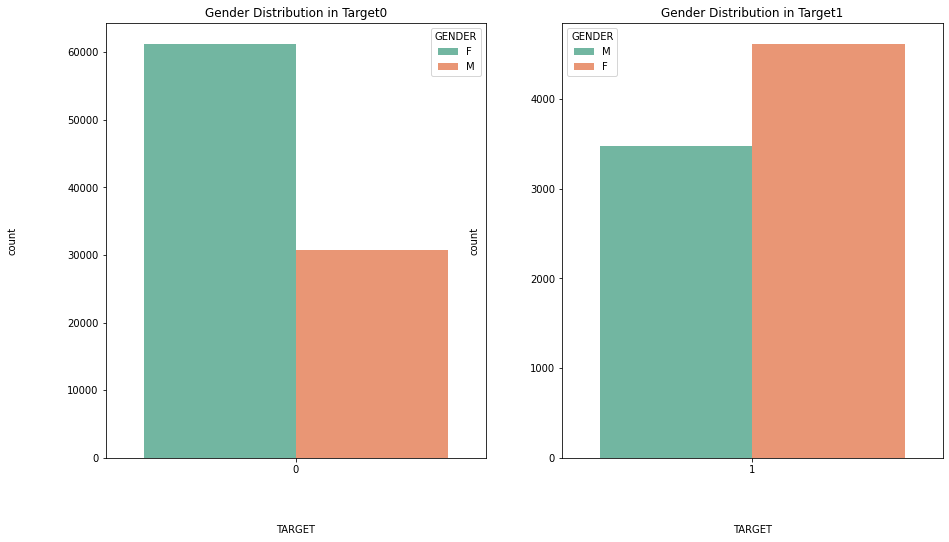

In [205]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.countplot(x='TARGET',hue='GENDER',data=Target0, palette = 'Set2')
plt.title("Gender Distribution in Target0")
plt.subplot(122)
sns.countplot(x='TARGET',hue='GENDER',data=Target1, palette = 'Set2')
plt.title("Gender Distribution in Target1")

plt.show()

##### Interpretation:
> Here in the above chart we can notice that in TARGET0 ("All other cases") Female clients are more than the Male & TARGET1 ("Client with payment difficulties") Male clients are more than the Female.  

* It seems like Female clients applied higher than male clients for loan  
* Approx. 65% Female clients are non-defaulters while 35% male clients are non-defaulters.  
* Approx. 55% Female clients are defaulters while 45% male clients are defaulters.  

# 2. Target v/s Name Contract Type

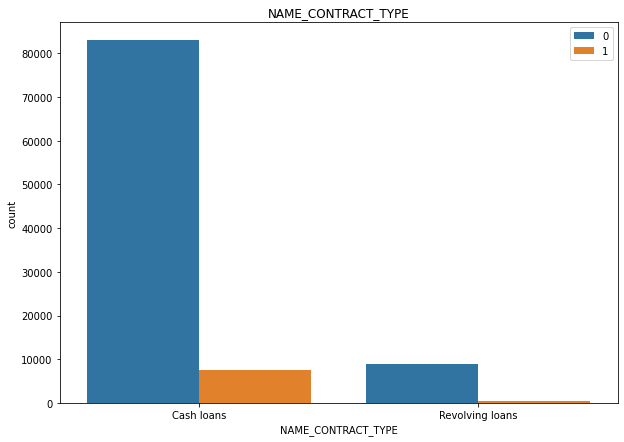

In [162]:
cat_cat_hist("NAME_CONTRACT_TYPE")

>TARGET 0 = "All other cases"  
TARGET 1 = "Client with payment difficulties"

##### Interpretation:
>cash loans have less defaulters wrt the total clients of cash loans  
clients  are less having revolving loans have as well less defaulters wrt the total clients of loans

# 3. Target v/s House

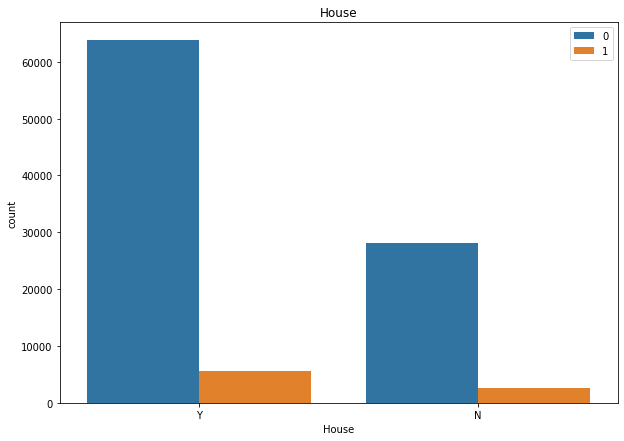

In [164]:
cat_cat_hist("House")

>TARGET 0 = "All other cases"  
TARGET 1 = "Client with payment difficulties"

##### Interpretation:
>From the above chart we can notice that the clients who own a house has a consistency in payments when compared to the clients who doesn't own a house wrt the total clients.  

# 4. Target v/s Name Education Type

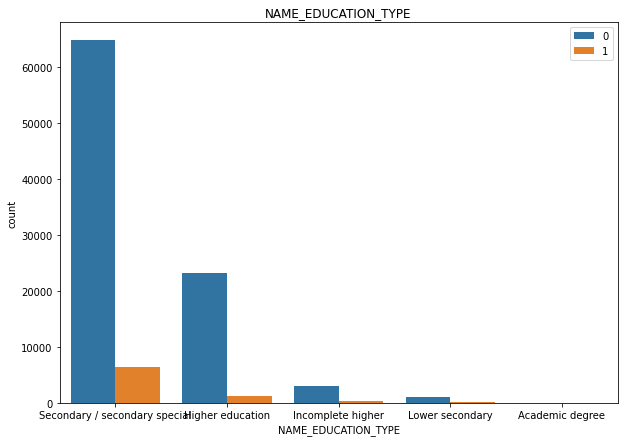

In [233]:
cat_cat_hist("NAME_EDUCATION_TYPE")

>TARGET 0 = "All other cases"  
TARGET 1 = "Client with payment difficulties"

##### Interpretation:
>

# 5. Target v/s Name Income Type

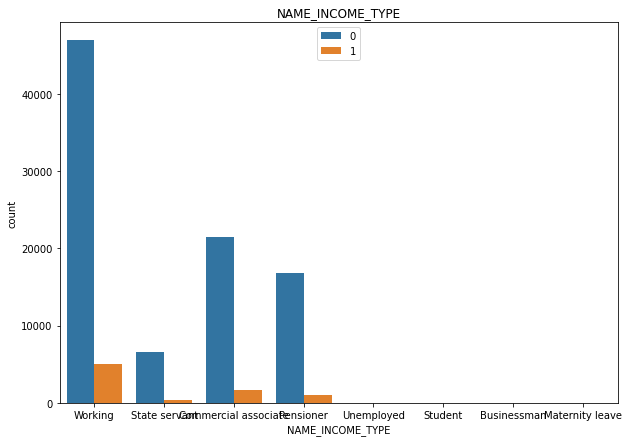

In [234]:
cat_cat_hist("NAME_INCOME_TYPE")

>TARGET 0 = "All other cases"  
TARGET 1 = "Client with payment difficulties"

##### Interpretation:
>

# 6. Target v/s Name Family Status

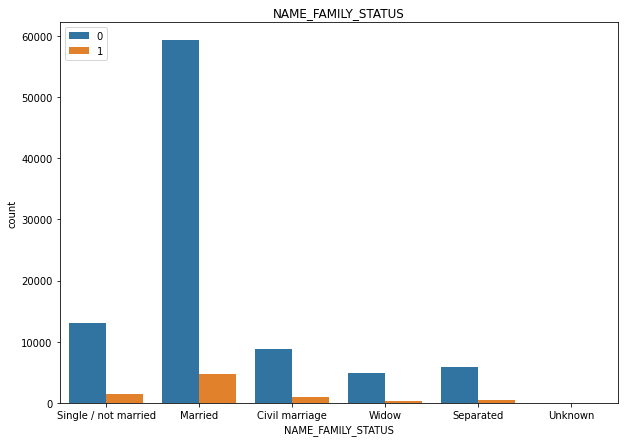

In [236]:
cat_cat_hist("NAME_FAMILY_STATUS")

>TARGET 0 = "All other cases"  
TARGET 1 = "Client with payment difficulties"

##### Interpretation:
>

# 7. Target v/s Occupation Type

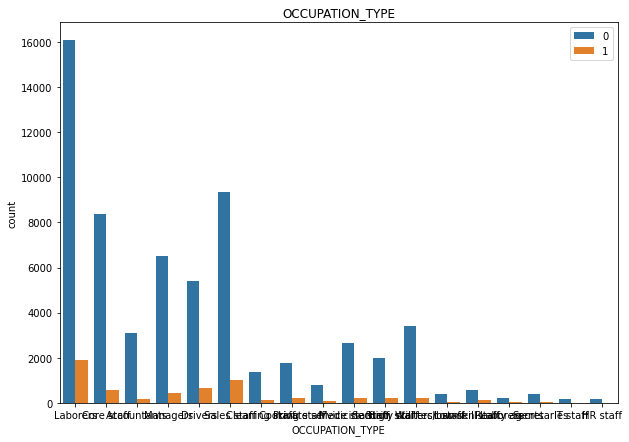

In [235]:
cat_cat_hist("OCCUPATION_TYPE")

>TARGET 0 = "All other cases"  
TARGET 1 = "Client with payment difficulties"

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(14,5))
x=x.sort_values()
sns.countplot(x='TARGET',
              hue='OCCUPATION_TYPE',
              data=df, 
              palette='BuGn',
              ax=axes[0],);

sns.countplot(x='city',
              hue='furniture',
              data=df,
              palette='Blues',
              ax=axes[1]);

##### Interpretation:
>

# --------------------------------------------------------------------------------------------------------------- 

# LEVEL 3 Analysis:

# $Multivariate \ Analysis \$

# RELATIONS:

In [14]:
TARGET0=df[(df.TARGET==0)]
TARGET0[:5]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,454500.0,...,-1588,1,1,1,1,0,Laborers,2.0,WEDNESDAY,1


In [13]:
TARGET1=df[(df.TARGET==1 )]
TARGET1[:5]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,702000.0,...,-2628,1,1,0,1,0,Cooking staff,1.0,MONDAY,2
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,855000.0,...,-1262,1,1,0,1,0,Laborers,2.0,TUESDAY,1
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,238500.0,...,-3597,1,1,1,1,0,Sales staff,2.0,THURSDAY,1
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,252000.0,...,365243,1,0,0,1,0,NaN,2.0,THURSDAY,1


# 1. EDUCATION TYPE v/s FAMILY STATUS v/s TYPE AMOUNT CREDIT: 

Text(0.5, 1.0, 'Credit Amount vs Education Status For TARGET0')

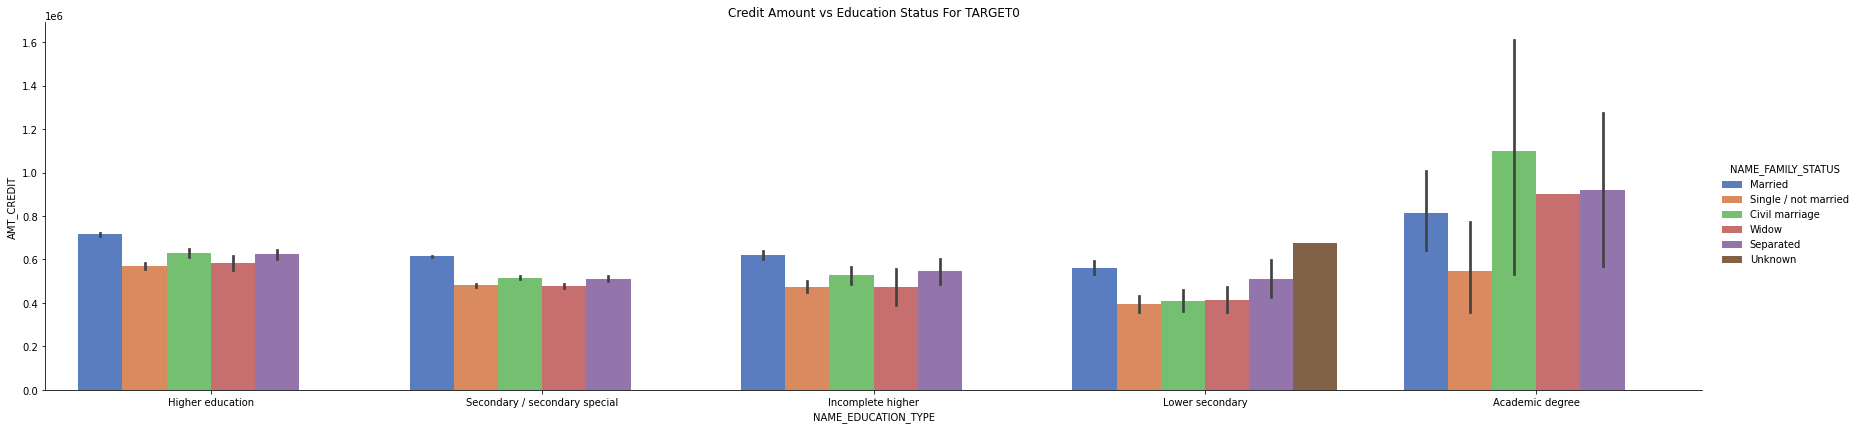

In [251]:
#ploting NAME_EDUCATION_TYPE vs AMT_CREDIT for each family status for Target0.....

sns.catplot(data =TARGET0, x='NAME_EDUCATION_TYPE',
                           y='AMT_CREDIT',
                          hue ='NAME_FAMILY_STATUS',
                          height=6,aspect=4, 
                         kind="bar", 
                         palette="muted")

plt.title('Credit Amount vs Education Status For cwpd')

##### Interpretation:  
Points to be concluded from the above graph for target = 0 (Non-Defaulters).  
* Customers holding academic degree have greater credit amount, Civil marriage segment being the highest among them.  
* Lower educated customers tends to have lower credit amount, Widows being the lowest among them  
* Married customers in almost all education segment except lower secondary and academic degrees have a higher credit amount.  

# NAME_EDUCATION_TYPE vs AMT_CREDIT vs FAMILY

Text(0.5, 1.0, 'Credit Amount vs Education Status for TARGET1')

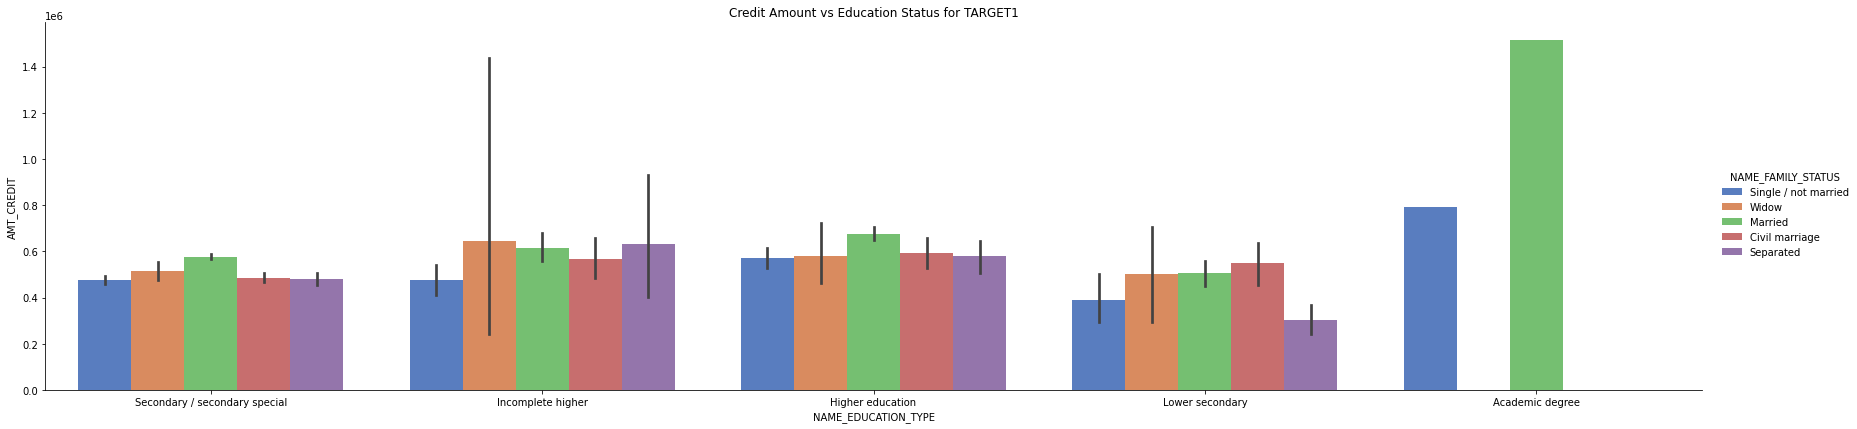

In [252]:
#ploting NAME_EDUCATION_TYPE vs AMT_CREDIT for each family status for target1.....

sns.catplot(data =TARGET1, x='NAME_EDUCATION_TYPE',
                            y='AMT_CREDIT',
                            hue ='NAME_FAMILY_STATUS',
                            height=6,aspect=4,
                            kind="bar",
                            palette="muted")

plt.title('Credit Amount vs Education Status for TARGET1')

##### Interpretation:  
Points to be concluded from the above graph for target = 1 (Defaulters).  
* Married Academic degree holding customers generally have a higher credit amount and so their defaulting rate is also high.  
* Accross all education segment married customer tends to have higher credit amount  
* Customers holding lower eductation tends to have a lower credit amount...  
* Single and Married are the only 2 family types present in academic degree .  

# 2.FAMILY STATUS v/s EDUCATION v/s AMOUNT CREDIT wrt TARGET:

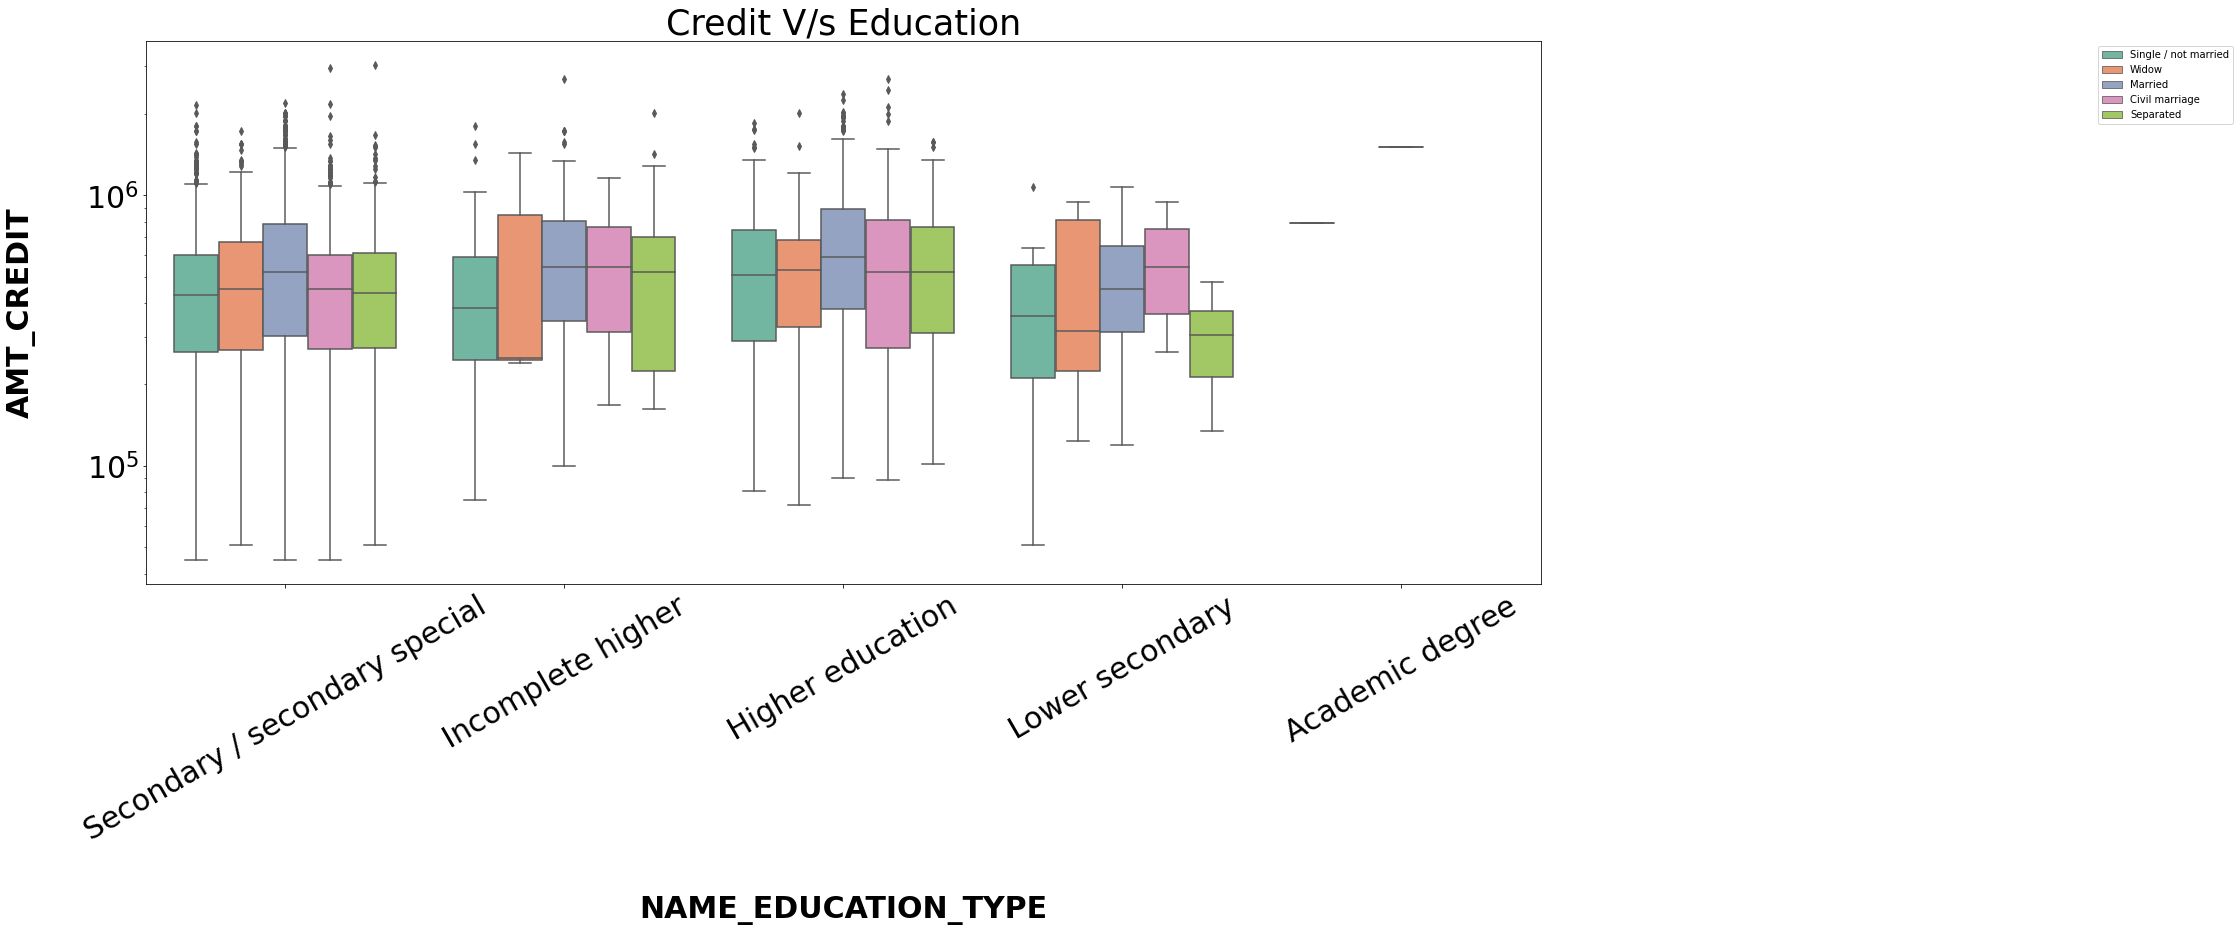

In [42]:
plt.figure(figsize=(25,10))
plt.yscale('log')                      #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =TARGET1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',           #Boxplot w.r.t Data Target 0
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper right')            #Adjusting legend position
plt.title('Credit V/s Education',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=30, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

##### INTERPRETRATION: 

>Clients with different Education types except Academic degrees have a large number of outliers**  
Most of the population i.e. clients’ credit amounts lie below 25%.  
Clients with an Academic degree and who is a widow tend to take higher credit loan.      
Some of the clients with Higher Education, Incomplete Higher Education, Lower Secondary Education and Secondary/Secondary Special Education are more likely to take a high amount of credit loans  

# 3. INCOME VS EDUCATION VS FAMILY wrt TARGET[Defaulters]

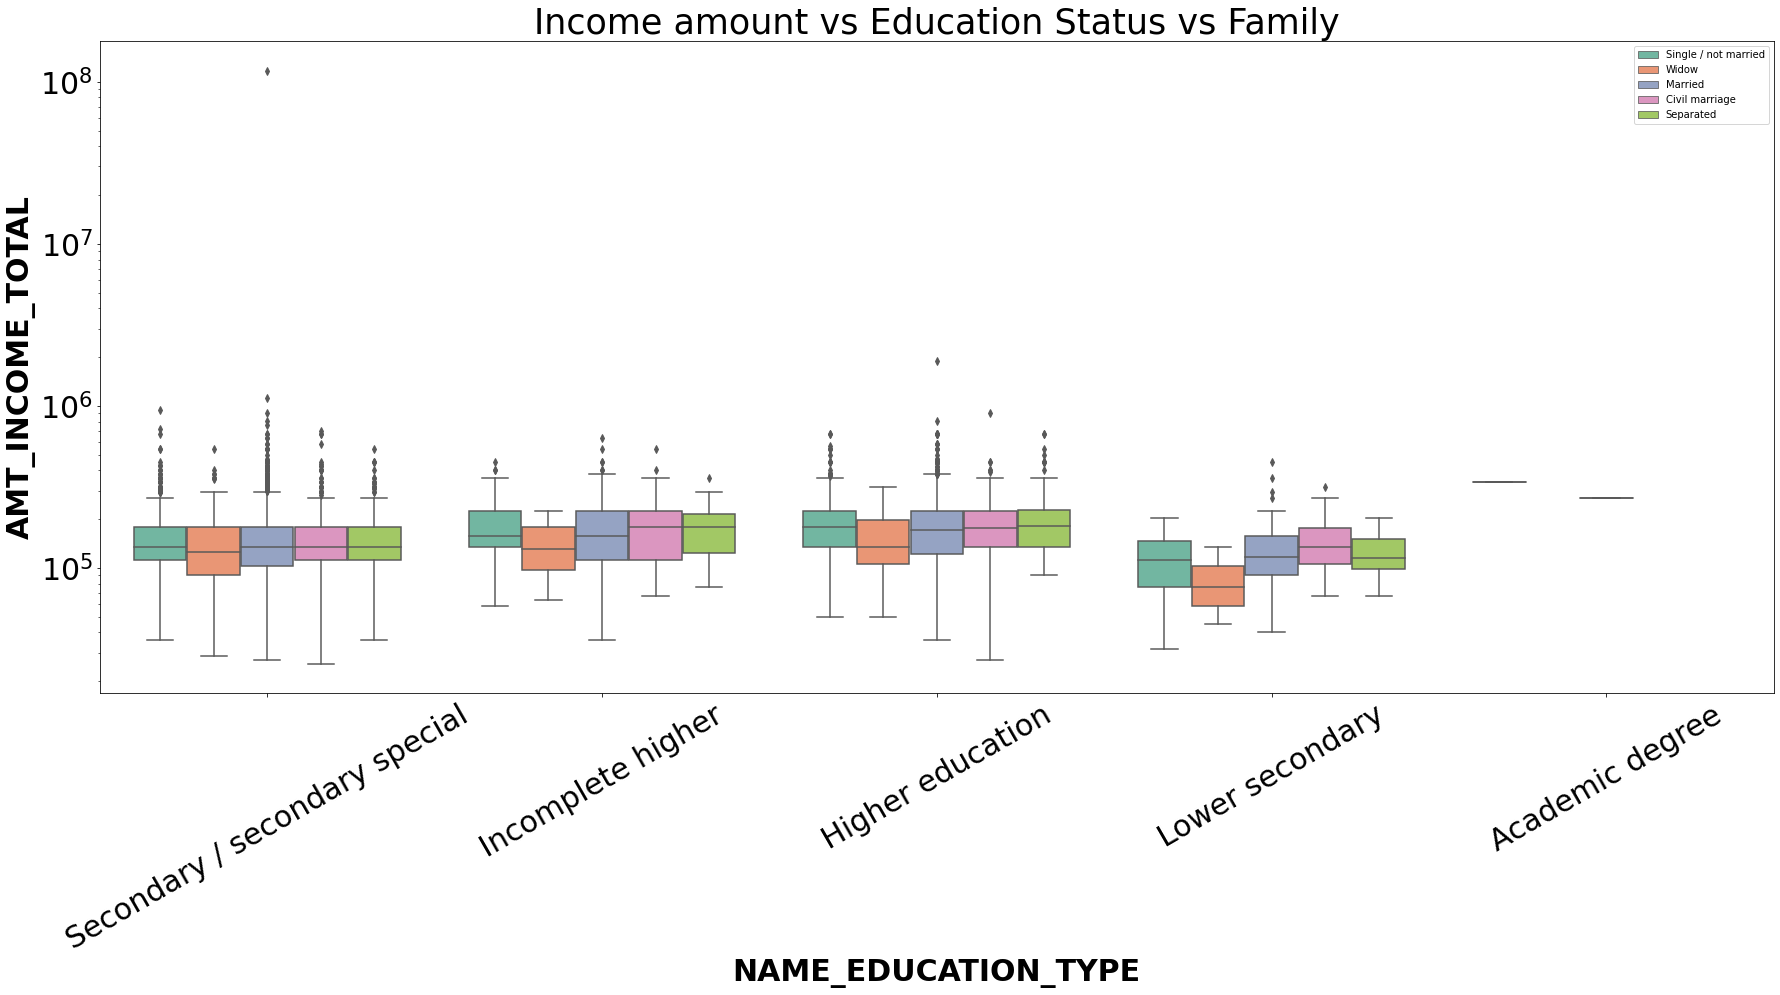

In [28]:
plt.figure(figsize=(30,12))

#As the values are too large, it is convinient to use log for better analysis
plt.yscale('log') 

plt.xticks(rotation = 90)

#Boxplot w.r.t Data Target 1
sns.boxplot(data =TARGET1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')

#Adjusting legend position
plt.legend( loc = 'upper right')                                              
plt.title('Income amount vs Education Status vs Family',fontsize= 35)
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=30, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

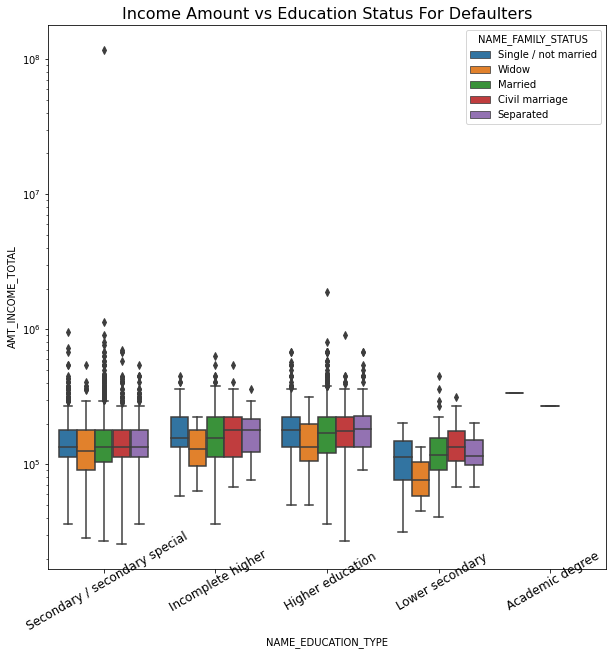

In [29]:
# Box plotting for Income amount vs Education Status for Target 1 in logarithmic scale

plt.figure(figsize=(10,10))
plt.xticks(rotation=30,ha="center",rotation_mode="anchor",fontsize=12)
plt.yscale('log')
sns.boxplot(data =TARGET1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS')
plt.title('Income Amount vs Education Status For Defaulters',fontsize=16)
plt.show()

##### INTERPRETATION:
>The income amount for the married clients holding an academic degree is much less as compared to the other applicants.  
Applicants ave relatively less income as compared to the Non - Defaulters

# ---------------------------------------------------------------------------------------------------------------

# Conclusion:

>>we have extensively covered pre-processing steps required to analyze data  
We have covered Null value imputation methods  
We have also covered step by step analyzing techniques such as Univariate analysis, Bivariate analysis, Multivariate analysis,  etc  
##### Factors whether  an applicant will be a Repayer:
* Genderwise as Male is in higher propertion so their may be chances of Males to be defaulter in majority.   
* Students and Businessman have very least defaulters.  
* Applicants whom income statement is above 7,00,000 are less likely to be defaulter.
* People with zero to two children tend to repay the loans.  

##### Factors whether an applicant may be a Defaulter:
* Male is in higher proportion so they are at relatively defaulter rate.    
* People who have civil marriage or who are single defaulters in majority.
* People with lower and secondary education.  
* Can avoid low-skilled labours or labourers for higher amount of loan as thier defaulter rate is high.  
* Applicants who are having children 3 or more than 3 are also defaulters and also applicants having children more than 5 are     defaulters and thier applications can to be rejected. 
* When the credit amount is beyond 3 lacs there is an increase in defaulters.  

##### Factors to mitigate default risk wrt bussiness loss is, to grant loan on some conditions of high interest rate:
* High no. of loans applications are from the category of people who live in rented houses and big families and hence             offering the loan would mitigate the loss if any default.  
* People who get loan for 3-6 Lakhs tend to default more than others and hence having higher interest specifically for this       credit range would be ideal. 
* Applicants who have 4 - 8 children has a very high defaulters proportion and thus higher interest rate can be imposed.
* Since majority of the applicants have Income less than 3 Lacs and have high probability to be in default, they could be         offered loan with higher interest. 

##### Piece of Advice:
* Limit often granting loans (Revolving loans) to new accounts or applicants.  
* 

In [33]:
def categorical_plot(var):
    plt.figure(figsize=(40,20))
    
    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(1, 2, 1)
    sns.countplot(var, data=TARGET0, palette = 'Set3', hue='TARGET') 
    plt.xlabel(var, fontsize= 30, fontweight="bold")                                                         #Target 0
    plt.ylabel('Non-D', fontsize= 30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    
    
    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(1, 2, 2)
    sns.countplot(var, data=TARGET1, palette = 'Set1', hue='TARGET')                                           # Target 1
    plt.xlabel(var, fontsize= 30, fontweight="bold")
    plt.ylabel('D', fontsize= 30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)

In [38]:
categorical_col = list(df.select_dtypes(include= 'category').columns)


categorical_col #Checking after removing columns

[]

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


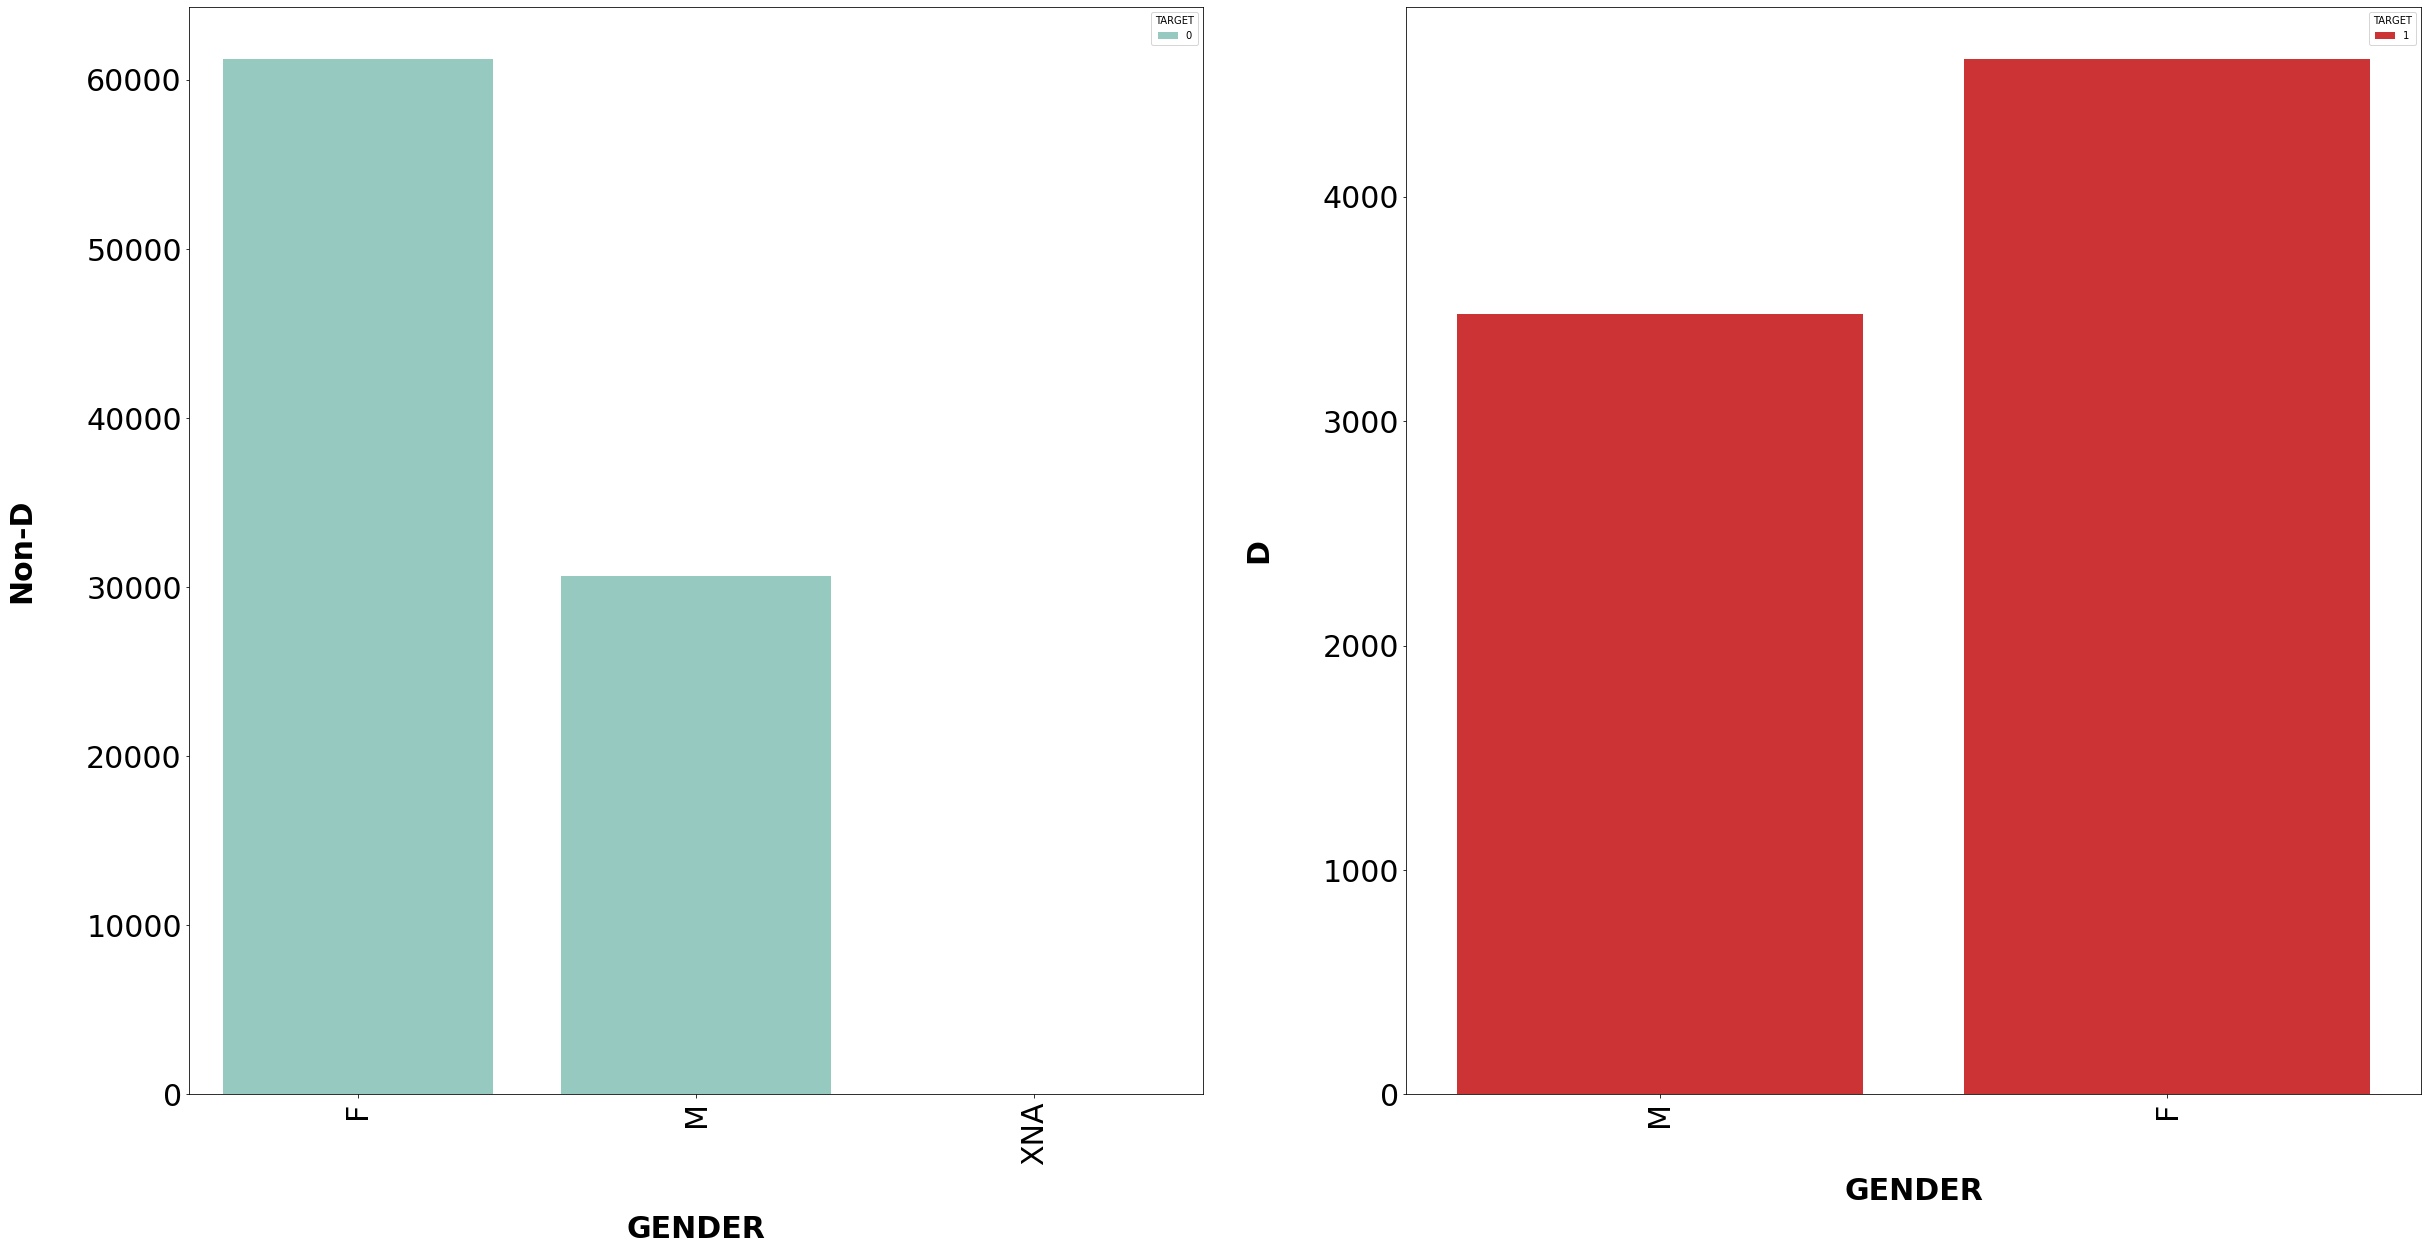

In [36]:
categorical_plot("GENDER")

In [41]:
for cat in categorical_col:
    categorical_plot(cat)